This notebook shows how to run a simple 2D example of DIVA.<br>
The input files and the figures are created within the notebook.

In [24]:
import os
import logging
import shutil
import subprocess

We will use functions defined in the divafunctions module to make the code easier to read.

In [2]:
from divafunctions import *

# Setup 

Adapt the path to the diva installation you want to work with.

In [3]:
divadir = "/home/ctroupin/Software/DIVA/diva-4.7.1"

## Logging configuration

In [4]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

Create the directory and in the input files names.

In [5]:
divabindir, divasrcdir, diva2Ddir, diva4Ddir = make_diva_directorynames(divadir)
ContourFile, DataFile, ParameterFile, ValatxyFile = make_diva2D_filenames(diva2Ddir)

DEBUG:root:/home/ctroupin/Software/DIVA/diva-4.7.1 exists


# Prepate the input files

## Contour

Create a sequence of points representing the contour (no crossing, no duplicate points, etc).<br>
It is defined as a list of list of tuples (don't forget the double brackets!).

In [6]:
contours = [[(0., 0.), (2., 0.), (2., 4.), (0., 4.)], 
           [(2.5, 0.), (6., 0.), (6., 3.), (2.5, 3.)]
           ]

In [7]:
write_contour(contours, ContourFile)

DEBUG:root:Sub-contour no. 0 has 4 points
DEBUG:root:Sub-contour no. 1 has 4 points
INFO:root:Writen contour file /home/ctroupin/Software/DIVA/diva-4.7.1/DIVA3D/divastripped/input/coast.cont 
containing 2 contours


## Data

Create a sequence of coordinates and values representing the data points. <br>
It is defined as a list of tuples, each tuple containing 3 or 4 values (if weights are also included).<br>
It is not a problem to mix 3- and 4-value tuples, as diva can deal with such kind of data file.=+

In [8]:
data = [(1.2, 2.1, 1., 1.), (2., 3.5, -2), (3., 2., 4), (5.5, 0.2, -1)]

In [9]:
write_data(data, DataFile)

INFO:root:Written data file /home/ctroupin/Software/DIVA/diva-4.7.1/DIVA3D/divastripped/input/data.dat 
containing 4 data points


## Parameters

In [10]:
xmin, ymin, nx, ny, dx, dy = 0.0, 0.0, 61, 81, 0.1, 0.05

In [11]:
CorrelationLength = 1.5
SignalToNoiseRatio = 0.5
VarianceBackgroundField = 1.0
ExclusionValue = -999.
iCoordChange = 0
iSpec = 11
iReg = 0

In [12]:
write_parameter(CorrelationLength, iCoordChange, iSpec, iReg, xmin, ymin, dx, dy, nx, ny,
                ExclusionValue, SignalToNoiseRatio, VarianceBackgroundField, ParameterFile)

INFO:root:Written parameter file /home/ctroupin/Software/DIVA/diva-4.7.1/DIVA3D/divastripped/input/param.par


# Run diva

## Mesh generation

In [13]:
logging.info("Generating finite element mesh")
subprocess.Popen("./divamesh", cwd=diva2Ddir, shell=True)

INFO:root:Generating finite element mesh


## Run the diva calculation

In [14]:
logging.info("Generating gridded field")
subprocess.Popen("./divacalc", cwd=diva2Ddir, shell=True)

INFO:root:Generating gridded field


# Time for some plots

In [25]:
import netCDF4
import matplotlib.pyplot as plt
%matplotlib inline

## Results 

In [19]:
with netCDF4.Dataset(os.path.join(diva2Ddir, 'output/ghertonetcdf/results.nc')) as nc:
    x = nc.variables['x'][:]
    y = nc.variables['y'][:]
    field = nc.variables['analyzed_field'][:]
    try:
        error = nc.variables['errer_field'][:]
    except KeyError:
        logger.info('No error field stored in the file.')

INFO:root:No error field stored in the file.


In [30]:
def diva_plot_analysis(x, y, field, cmap=plt.cm.RdYlBu_r):
    pcm = plt.pcolormesh(x, y, field, cmap=cmap)
    cbar = plt.colorbar(pcm)
    return pcm, cbar

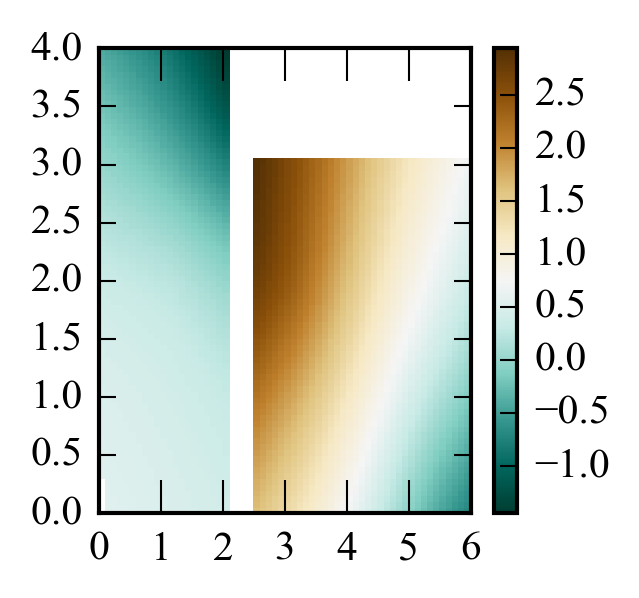

In [34]:
cmap = plt.cm.BrBG_r
fig = plt.figure(figsize=(2, 2))
pcm, cbar = diva_plot_analysis(x, y, field, cmap=cmap)
plt.show()

In [47]:
DataFile

'/home/ctroupin/Software/DIVA/diva-4.7.1/DIVA3D/divastripped/input/data.dat'

(1.2, 2.1, 1.0, 1.0)
(2.0, 3.5, -2)
(3.0, 2.0, 4)
(5.5, 0.2, -1)


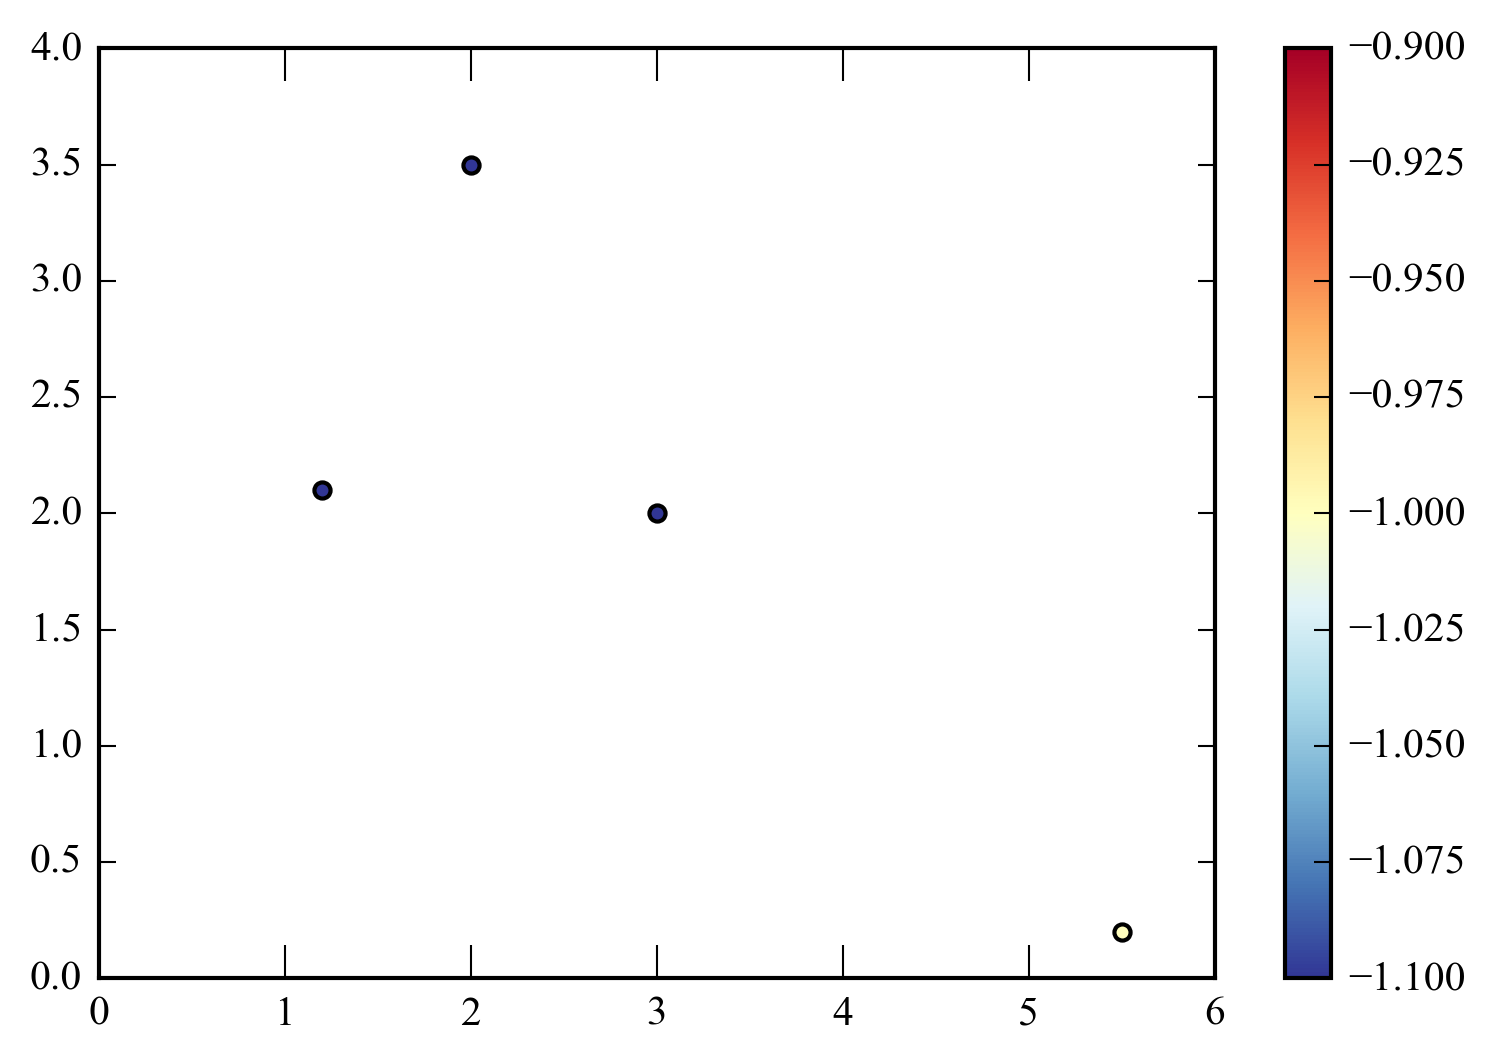

In [46]:
for datapoints in data:
    print(datapoints)
    scat = plt.scatter(datapoints[0], datapoints[1], s=15, c=datapoints[2], 
                edgecolor=None, cmap=plt.cm.RdYlBu_r)
plt.colorbar(scat)
plt.show()